In [15]:
import json
import pandas as pd
import numpy as np

baseData = json.load(open("processed_data/baseData.json","r"))

N0  = json.load(open("processed_data/N0.json","r"))

programs = pd.read_csv("Data/summerOly_programs.csv",encoding = "latin1")
programs2028 = pd.read_csv("Data/2028_LA_sport.csv")

YearA3  = json.load(open("processed_data/YearA3.json","r"))

In [16]:
print(programs.head())
print(programs2028.head())
print(len(programs))
print(len(programs2028))

      Sport         Discipline Code Sports Governing Body 1896 1900 1904  \
0  Aquatics  Artistic Swimming  SWA        World Aquatics    0    0    0   
1  Aquatics             Diving  DIV        World Aquatics    0    0    2   
2  Aquatics  Marathon Swimming  OWS        World Aquatics    0    0    0   
3  Aquatics           Swimming  SWM        World Aquatics    4    7    9   
4  Aquatics         Water Polo  WPO        World Aquatics    0    1    1   

   1906*  1908 1912  ...  1988 1992  1996  2000  2004  2008  2012  2016  2020  \
0      0     0    0  ...     2    2   1.0   2.0   2.0   2.0   2.0   2.0   2.0   
1      1     2    4  ...     4    4   4.0   8.0   8.0   8.0   8.0   8.0   8.0   
2      0     0    0  ...     0    0   0.0   0.0   0.0   2.0   2.0   2.0   2.0   
3      4     6    9  ...    31   31  32.0  32.0  32.0  32.0  32.0  32.0  35.0   
4      0     1    1  ...     1    1   1.0   2.0   2.0   2.0   2.0   2.0   2.0   

   2024  
0   2.0  
1   8.0  
2   2.0  
3  35.0  
4   2.

In [17]:
programs_modified = programs.rename(columns=lambda x: x.replace('*', '') if '*' in x else x)
programs_modified = programs_modified[~programs_modified['Sport'].isin(['Skating', 'Ice Hockey','Total events',"Total disciplines","Total sports"])]
programs_modified = programs_modified.apply(pd.to_numeric, errors='coerce').fillna(0)

programs2028_modified = programs2028[~programs2028['Sport'].isin(['Skating', 'Ice Hockey','Total events',"Total disciplines","Total sports"])]
programs2028_modified = programs2028_modified.apply(pd.to_numeric, errors='coerce').fillna(0)
# print(programs_modified)


In [18]:

# 获取除前六列之外的所有列
remaining_columns = programs_modified.columns[4:]

# 将这些列转换为键值对的形式
result = programs_modified[remaining_columns].to_dict(orient='records')
result = {col: programs_modified[col].tolist() for col in remaining_columns}
print(type(result))
print(result['1906'])
totalpop = YearA3["Total"]
for key,value in totalpop.items():
    result[key].extend([(int(key)-1896)/4,value])

print(result["1906"])


<class 'dict'>
[0, 1, 0, 4, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 8, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 4]
[0, 1, 0, 4, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 8, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 4, 2.5, 1733]


In [19]:
data = [value for _,value in result.items()]
data = np.array(data)
# print(data)
# print(data[3,:])

x_train = data[:,:-1]
y_train = data[:,-1]
print(x_train[3,:])
print(y_train[3])
x_pred  = programs2028_modified['2028'].values
x_pred = np.append(x_pred,(2028-1896)/4)
print(x_pred)

print(x_train.shape)
print(x_pred.shape)



[ 0.   1.   0.   4.   0.   0.  21.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   1.   5.   0.   0.   0.   0.
  0.   8.   0.   0.   1.   0.   4.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   6.   0.   0.   0.  16.   0.   0.
  0.   0.   0.   0.   4.   0.   1.   0.   0.   0.   0.   0.   4.   2.5]
1733.0
[ 2.  8.  2. 35.  2.  5. 48.  5.  1.  1.  2.  2.  0.  0.  0. 10.  6.  2.
  0.  2.  2.  2.  4. 12.  2.  2.  2.  0.  0. 12.  2.  2.  2.  2. 14.  2.
  2.  2.  0.  0. 15.  0.  2.  0.  2.  0.  0.  0.  3. 12.  2.  0. 10. 15.
  4.  4.  2.  2.  5.  8.  5.  3.  0.  2.  2.  0. 10. 12.  6. 33.]
(31, 70)
(70,)


In [20]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge
# 创建并训练线性回归模型
# model = Ridge(alpha=100)  # alpha 控制正则化强度，值越大，正则化越强
# model.fit(x_train, y_train)

# # 进行预测
# x_pred = x_pred.reshape(1, -1)
# y_pred = model.predict(x_pred)

model = Ridge(alpha=100,fit_intercept=False)  # alpha 控制正则化强度，值越大，正则化越强
model.fit(x_train, y_train)

# 进行预测
x_pred = x_pred.reshape(1, -1)
y_pred = model.predict(x_pred)


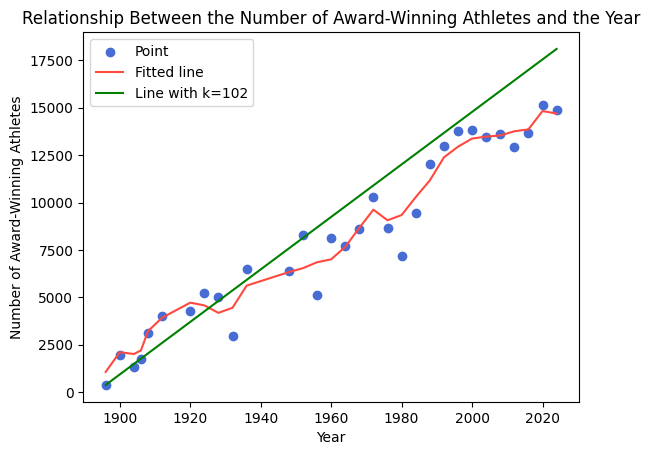

Predicted labels for the test data: [14217.60324046]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 假设x_train, y_train, model 和 y_pred 已经定义过
# 添加直线 k=25, 起始点为 y_train[0]

# 计算k=25直线的y值
k = 102.43065282
x_vals = x_train[:,-1] * 4 + 1896  # 获取x坐标
y_line = k * x_vals + (y_train[0] - k * x_vals[0])  # 直线的y值

# 可视化
plt.scatter(x_vals, y_train, color='#476DD5', label='Point')  # 训练数据点
plt.plot(x_vals, model.predict(x_train), color='#ff4940', label='Fitted line')  # 拟合曲线
plt.plot(x_vals, y_line, color='green', label=f'Line with k=102')  # 添加斜率为25的直线
plt.title("Relationship Between the Number of Award-Winning Athletes and the Year")
plt.xlabel("Year")
plt.ylabel("Number of Award-Winning Athletes")
plt.legend()
plt.show()

# 输出测试数据的预测标签
print("Predicted labels for the test data:", y_pred)


In [22]:
# 获取回归系数和截距
coefficients = model.coef_
intercept = model.intercept_

print("Ridge Regression Coefficients:", coefficients)
print("Ridge Regression Intercept:", intercept)

Ridge Regression Coefficients: [ 20.88446542  32.88465603  -8.75986558  86.90051545   3.00334797
 -58.07786338  38.66148455  64.88091649  22.2062928   16.21044022
   9.9871717    5.27955921  -1.69262757  57.84387939   4.02198382
 100.15454341  87.98807064  -1.69262757  -5.0778827    9.9871717
  -8.75986558  16.35900246  37.53427703  11.72246542  11.60568722
  26.25782015  21.17993745  -8.53944046  -3.38525514  16.99395034
  -2.5971311    0.          21.53889018 -10.94523909 -26.35963175
  22.81644909  -0.41985812 -15.2550873    8.91196759  -1.13494416
  43.9889556   23.86075153   0.          -8.22300547  11.40200971
   8.39650974  -2.26988833  -7.08806131   0.         -56.74448296
   6.61613867  -0.51545784  42.50369175  29.02148411  19.9743434
  14.00915552   0.           9.9871717   96.6861175   -1.6794325
  47.51894224   4.57372773 -17.65957294  16.35900246  -9.15914401
  -3.40483249  13.11569296  25.46618285  54.09415553 138.19638721]
Ridge Regression Intercept: 0.0


In [23]:
print(y_train)

[  380.  1936.  1301.  1733.  3101.  4040.  4292.  5233.  4992.  2969.
  6506.  6405.  8270.  5127.  8119.  7702.  8588. 10304.  8641.  7191.
  9454. 12037. 12977. 13780. 13821. 13443. 13602. 12920. 13688. 15121.
 14892.]
